# Homework 12
Evelina Teran & Kevin Smith

In [52]:
from joblib import Parallel, delayed
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC


In [35]:
# Get the hill valley data
file_loc = "C:/codestuffs/Applied-Machine-Learning/hw12"
hv_train = pd.read_csv(file_loc + "/X.csv")
hv_train_labels = pd.read_csv(file_loc + "/Y.csv")
hv_test = pd.read_csv(file_loc + "/Xtest.csv")
hv_test_labels = pd.read_csv(file_loc + "/Ytest.csv")

In [36]:
# Get the sat data
sat_train = pd.read_csv(file_loc + "/sat_train_data.csv", header= None)
sat_train_labels = pd.read_csv(file_loc + "/sat_train_labels.csv", header=None)
sat_test = pd.read_csv(file_loc + "/sat_test_data.csv", header= None)
sat_test_labels = pd.read_csv(file_loc + "/sat_test_labels.csv", header=None)

In [37]:
# Get the madelon data
mad_train = pd.read_fwf(file_loc + "/madelon_train.data", header = None)
mad_train_labels = pd.read_fwf(file_loc + "/madelon_train.labels", header = None)
mad_test = pd.read_fwf(file_loc + "/madelon_valid.data", header = None)
mad_test_labels = pd.read_fwf(file_loc + "/madelon_valid.labels", header = None)

In [38]:
# Get the Gisette data
gis_train = pd.read_csv(file_loc + "/gisette_train.csv")
gis_train_labels = pd.read_csv(file_loc + "/gisette_train_labels.csv")
gis_test = pd.read_csv(file_loc + "/gisette_valid.csv")
gis_test_labels = pd.read_csv(file_loc + "/gisette_valid_labels.csv")
gis_train = np.delete(gis_train, 5000, axis=1)
gis_test = np.delete(gis_test, 5000, axis=1)

## Part 1a

In [39]:
train_errors_hv_poly = []
test_errors_hv_poly = []
for degree in range(1, 16):
    clf = SVC(C=1, kernel='poly', degree=degree)
    clf.fit(hv_train, hv_train_labels.values.ravel())  # Flatten the labels array
    train_errors_hv_poly.append(1 - clf.score(hv_train, hv_train_labels.values.ravel()))
    test_errors_hv_poly.append(1 - clf.score(hv_test, hv_test_labels.values.ravel()))


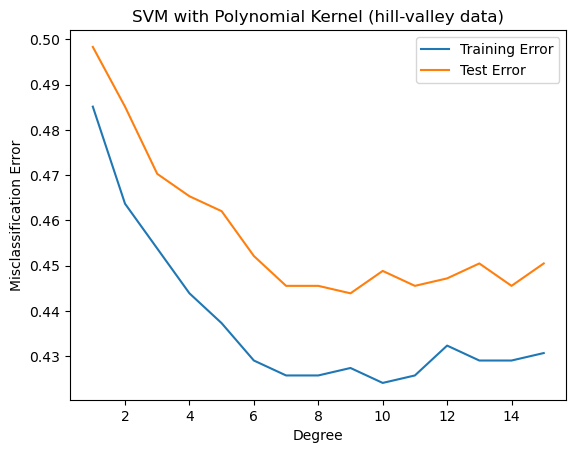

In [40]:
plt.figure()
plt.plot(range(1, 16), train_errors_hv_poly, label='Training Error')
plt.plot(range(1, 16), test_errors_hv_poly, label='Test Error')
plt.xlabel('Degree')
plt.ylabel('Misclassification Error')
plt.title('SVM with Polynomial Kernel (hill-valley data)')
plt.legend()
plt.show()

## Part 1b

In [41]:
train_errors_hv_rbf = []
test_errors_hv_rbf = []
for i in range(21):
    gamma_val = 2**(-i)
    clf = SVC(C=1, kernel='rbf', gamma=gamma_val)
    clf.fit(hv_train, hv_train_labels.values.ravel())
    train_errors_hv_rbf.append(1 - clf.score(hv_train, hv_train_labels.values.ravel()))
    test_errors_hv_rbf.append(1 - clf.score(hv_test, hv_test_labels.values.ravel()))


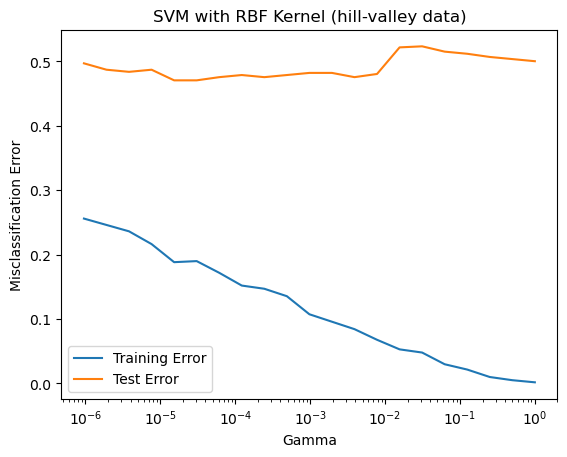

In [42]:
plt.figure()
plt.semilogx([2**(-i) for i in range(21)], train_errors_hv_rbf, label='Training Error')
plt.semilogx([2**(-i) for i in range(21)], test_errors_hv_rbf, label='Test Error')
plt.xlabel('Gamma')
plt.ylabel('Misclassification Error')
plt.title('SVM with RBF Kernel (hill-valley data)')
plt.legend()
plt.show()

## Part 1c

In [43]:
train_errors_sat_poly = []
test_errors_sat_poly = []
for degree in range(1, 6):
    clf = SVC(C=1, kernel='poly', degree=degree)
    clf.fit(sat_train, sat_train_labels.values.ravel())
    train_errors_sat_poly.append(1 - clf.score(sat_train, sat_train_labels.values.ravel()))
    test_errors_sat_poly.append(1 - clf.score(sat_test, sat_test_labels.values.ravel()))


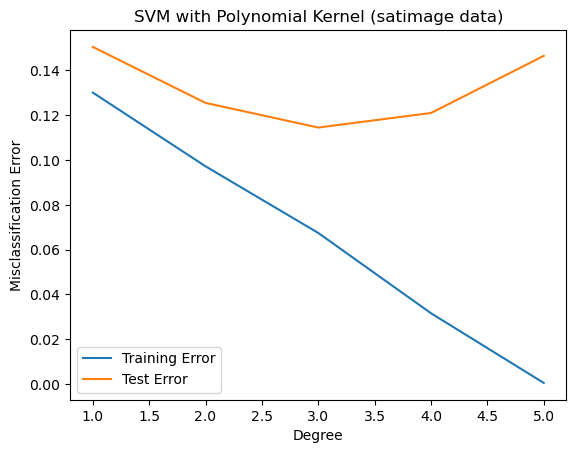

In [44]:
plt.figure()
plt.plot(range(1, 6), train_errors_sat_poly, label='Training Error')
plt.plot(range(1, 6), test_errors_sat_poly, label='Test Error')
plt.xlabel('Degree')
plt.ylabel('Misclassification Error')
plt.title('SVM with Polynomial Kernel (satimage data)')
plt.legend()
plt.show()

## Part 1d

In [45]:
train_errors_sat_rbf = []
test_errors_sat_rbf = []
for i in range(21):
    gamma_val = 2**(-i)
    clf = SVC(C=1, kernel='rbf', gamma=gamma_val)
    clf.fit(sat_train, sat_train_labels.values.ravel())
    train_errors_sat_rbf.append(1 - clf.score(sat_train, sat_train_labels.values.ravel()))
    test_errors_sat_rbf.append(1 - clf.score(sat_test, sat_test_labels.values.ravel()))


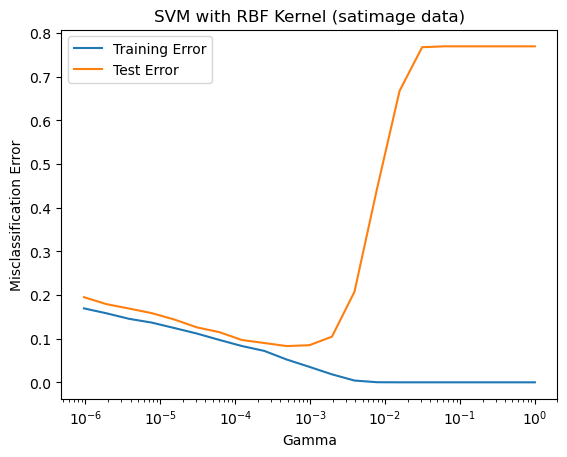

In [46]:
plt.figure()
plt.semilogx([2**(-i) for i in range(21)], train_errors_sat_rbf, label='Training Error')
plt.semilogx([2**(-i) for i in range(21)], test_errors_sat_rbf, label='Test Error')
plt.xlabel('Gamma')
plt.ylabel('Misclassification Error')
plt.title('SVM with RBF Kernel (satimage data)')
plt.legend()
plt.show()

## Part 1e

In [47]:
train_errors_madelon_poly = []
test_errors_madelon_poly = []
for degree in range(1, 16):
    clf = SVC(C=1, kernel='poly', degree=degree)
    clf.fit(mad_train, mad_train_labels.values.ravel())
    train_errors_madelon_poly.append(1 - clf.score(mad_train, mad_train_labels.values.ravel()))
    test_errors_madelon_poly.append(1 - clf.score(mad_test, mad_test_labels.values.ravel()))


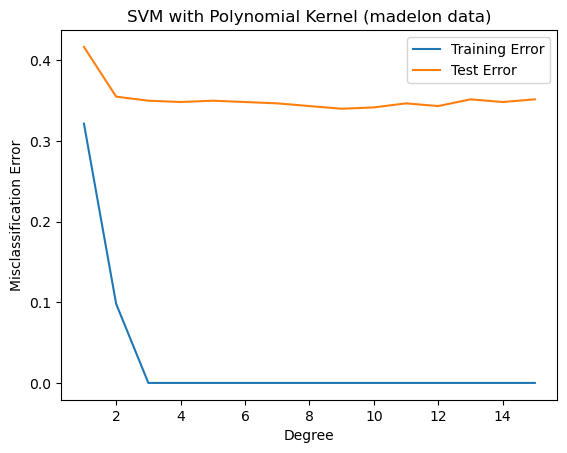

In [48]:
plt.figure()
plt.plot(range(1, 16), train_errors_madelon_poly, label='Training Error')
plt.plot(range(1, 16), test_errors_madelon_poly, label='Test Error')
plt.xlabel('Degree')
plt.ylabel('Misclassification Error')
plt.title('SVM with Polynomial Kernel (madelon data)')
plt.legend()
plt.show()

## Part 1f

In [49]:
train_errors_madelon_rbf = []
test_errors_madelon_rbf = []
for i in range(21):
    gamma_val = 2**(-i)
    clf = SVC(C=1, kernel='rbf', gamma=gamma_val)
    clf.fit(mad_train, mad_train_labels.values.ravel())
    train_errors_madelon_rbf.append(1 - clf.score(mad_train, mad_train_labels.values.ravel()))
    test_errors_madelon_rbf.append(1 - clf.score(mad_test, mad_test_labels.values.ravel()))


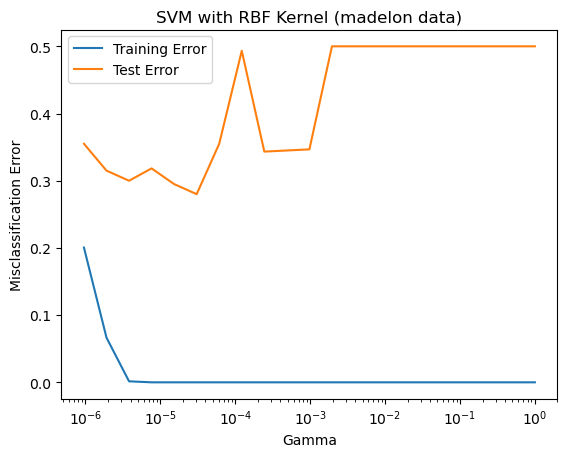

In [50]:
plt.figure()
plt.semilogx([2**(-i) for i in range(21)], train_errors_madelon_rbf, label='Training Error')
plt.semilogx([2**(-i) for i in range(21)], test_errors_madelon_rbf, label='Test Error')
plt.xlabel('Gamma')
plt.ylabel('Misclassification Error')
plt.title('SVM with RBF Kernel (madelon data)')
plt.legend()
plt.show()

## Part 1g

In [53]:
def train_and_evaluate_model(gamma_val, gis_train, gis_train_labels, gis_test, gis_test_labels):
    clf = SVC(C=1, kernel='rbf', gamma=gamma_val)
    clf.fit(gis_train, gis_train_labels.values.ravel())
    train_error = 1 - clf.score(gis_train, gis_train_labels.values.ravel())
    test_error = 1 - clf.score(gis_test, gis_test_labels.values.ravel())
    return train_error, test_error

gamma_values = [2**(-i) for i in range(21)]
results = Parallel(n_jobs=-1)(delayed(train_and_evaluate_model)(gamma_val, gis_train, gis_train_labels, gis_test, gis_test_labels) for gamma_val in gamma_values)

train_errors_gisette_rbf = [result[0] for result in results]
test_errors_gisette_rbf = [result[1] for result in results]

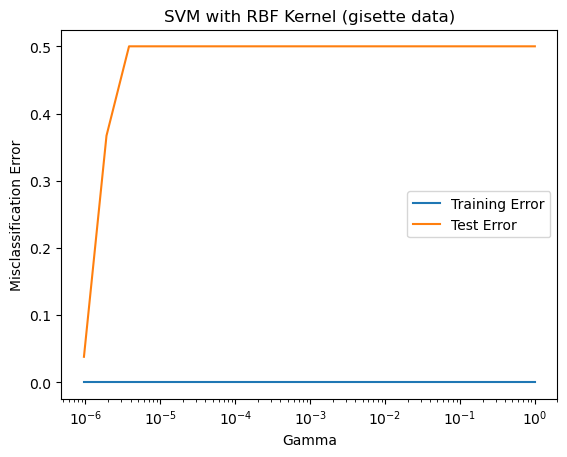

In [54]:
plt.figure()
plt.semilogx([2**(-i) for i in range(21)], train_errors_gisette_rbf, label='Training Error')
plt.semilogx([2**(-i) for i in range(21)], test_errors_gisette_rbf, label='Test Error')
plt.xlabel('Gamma')
plt.ylabel('Misclassification Error')
plt.title('SVM with RBF Kernel (gisette data)')
plt.legend()
plt.show()